# Notebook 8 — Advanced Math Topics for AI (Solutions)

This notebook contains worked-out **solutions** to the exercises in Notebook 8.

## Exercise 1 Solution — KL Divergence

We compute KL divergence between two discrete distributions `P` and `Q`.

In [1]:
import numpy as np

P = np.array([0.4, 0.6])
Q = np.array([0.5, 0.5])

kl_div = np.sum(P * np.log(P / Q))
kl_div

np.float64(0.020135513550688877)

**Explanation:**
- KL divergence measures how one probability distribution diverges from another.
- Here `D_KL(P||Q)` ≈ 0.0201, meaning `P` is close to `Q`.

## Exercise 2 Solution — Multivariate Gaussian PDF

We compute the PDF of a multivariate normal distribution.

In [2]:
from scipy.stats import multivariate_normal

mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

rv = multivariate_normal(mean, cov)
pdf_val = rv.pdf([0.2, -0.1])
pdf_val

np.float64(0.17539710630868563)

**Explanation:**
- The `multivariate_normal` function allows us to evaluate PDF values for arbitrary points.
- Useful in ML for Gaussian mixture models, anomaly detection, etc.

## Exercise 3 Solution — PCA from Covariance Matrix

We implement PCA using eigen decomposition of the covariance matrix.

In [3]:
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# Standardize
X_std = StandardScaler().fit_transform(X)

# Covariance matrix
cov_matrix = np.cov(X_std.T)

# Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort eigenvalues & eigenvectors
idx = np.argsort(eig_vals)[::-1]
eig_vals, eig_vecs = eig_vals[idx], eig_vecs[:, idx]

# Project onto first principal component
X_pca = X_std.dot(eig_vecs[:, 0])
X_pca[:5]  # show first 5 projections

array([ 1.08643242, -2.3089372 ,  1.24191895,  0.34078247,  2.18429003])

**Explanation:**
- PCA finds directions of maximum variance.
- Eigenvectors = principal components, Eigenvalues = variance explained.
- Here we projected data onto the 1st principal component.

## Exercise 4 Solution — Fourier Transform Example

We compute a Fourier transform of a simple signal.

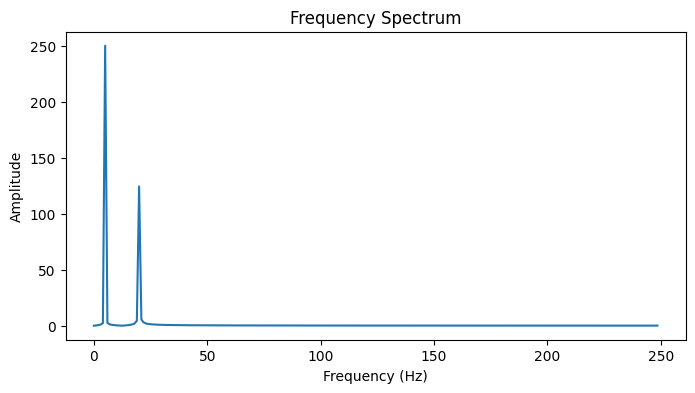

In [4]:
import matplotlib.pyplot as plt

# Create a signal (sum of 2 sinusoids)
t = np.linspace(0, 1, 500)
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*20*t)

# Fourier Transform
fft_vals = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), d=t[1]-t[0])

# Plot
plt.figure(figsize=(8,4))
plt.plot(freqs[:250], np.abs(fft_vals)[:250])
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

**Explanation:**
- Fourier transform decomposes a signal into frequencies.
- Peaks at 5 Hz and 20 Hz correspond to the frequencies in our signal.